In [ ]:
# Required Python Libraries
import os
import numpy as np
import cv2
import imghdr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [ ]:
# charts data directory
data_dir = '/content/drive/MyDrive/charts'

In [ ]:
# TensorFlow's Keras API to create an image dataset charts directiry
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 600 files belonging to 3 classes.


In [ ]:
# Converting the TensorFlow's created dataset (data) into a NumPy iterator
data_iterator = data.as_numpy_iterator()

In [ ]:
# Fetch the next batch of data from the iterator
batch = data_iterator.next()

In [ ]:
# Batch[0] holds the data
batch[0]

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:
# Batch[1] holds the labels
batch[1]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 0, 0], dtype=int32)

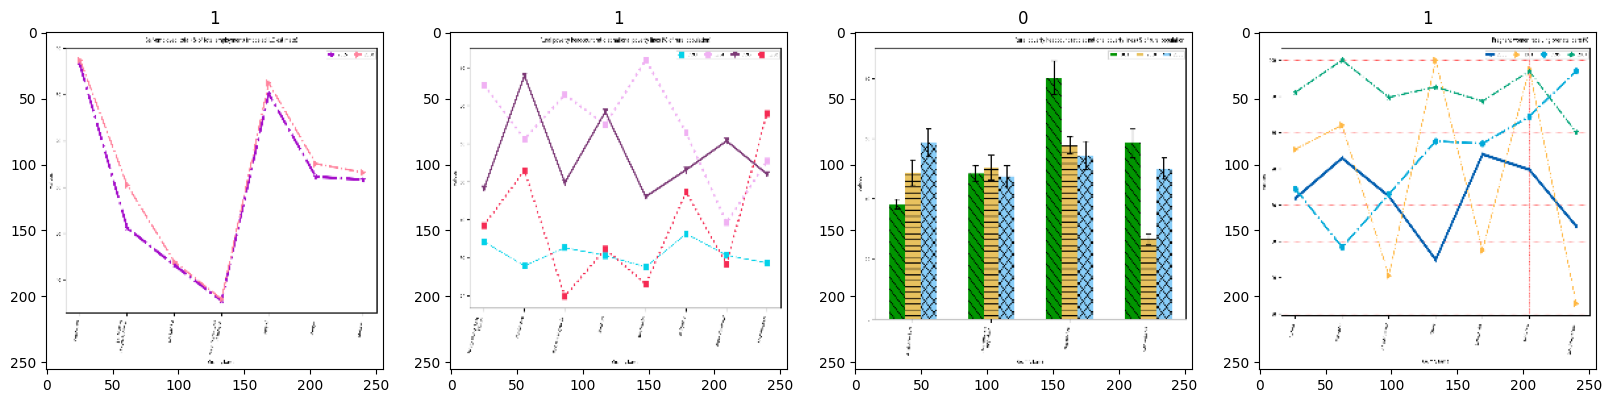

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Lebal 0 --> Bar Charts
# Lebal 1 --> Line Charts
# Lebal 2 --> Scatter Charts

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

255.0

In [ ]:
# Scaling the data: 0-255 => 0.0-1.00
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

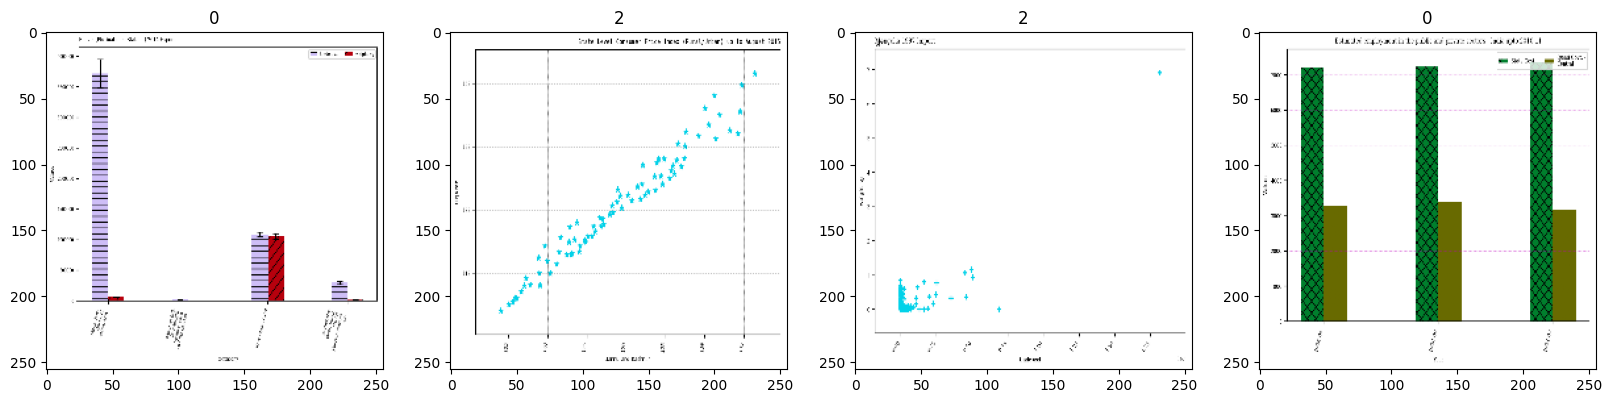

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

19

In [ ]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1
print(f'Train size: {train_size}')
print(f'Validation size: {val_size}')
print(f'Test size: {test_size}')

Train size: 14
Validation size: 3
Test size: 2


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
# Building the CNN Model
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling the model
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Training the model
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
14/14 [==============================] - 35s 2s/step - loss: 1.0135 - accuracy: 0.5000 - val_loss: 0.5555 - val_accuracy: 0.6458
Epoch 2/20
14/14 [==============================] - 44s 3s/step - loss: 0.6283 - accuracy: 0.7076 - val_loss: 0.4268 - val_accuracy: 0.9375
Epoch 3/20
14/14 [==============================] - 30s 2s/step - loss: 0.2714 - accuracy: 0.9263 - val_loss: 0.1150 - val_accuracy: 0.9688
Epoch 4/20
14/14 [==============================] - 39s 3s/step - loss: 0.1190 - accuracy: 0.9598 - val_loss: 0.0896 - val_accuracy: 0.9792
Epoch 5/20
14/14 [==============================] - 35s 2s/step - loss: 0.0353 - accuracy: 0.9844 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/20
14/14 [==============================] - 28s 2s/step - loss: 0.0212 - accuracy: 0.9955 - val_loss: 0.0187 - val_accuracy: 0.9896
Epoch 7/20
14/14 [==============================] - 28s 2s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/20
14/14 [==

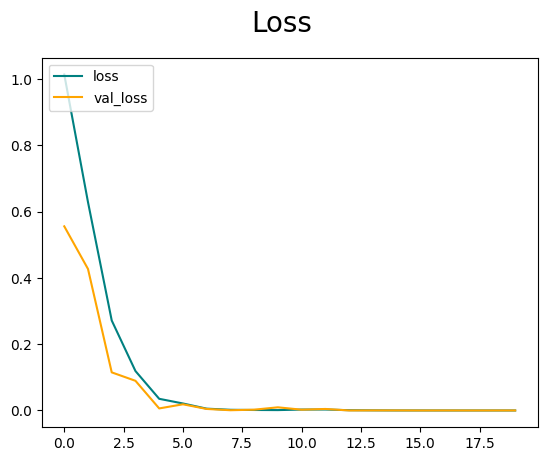

In [ ]:
# Plotting the Loss Value
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

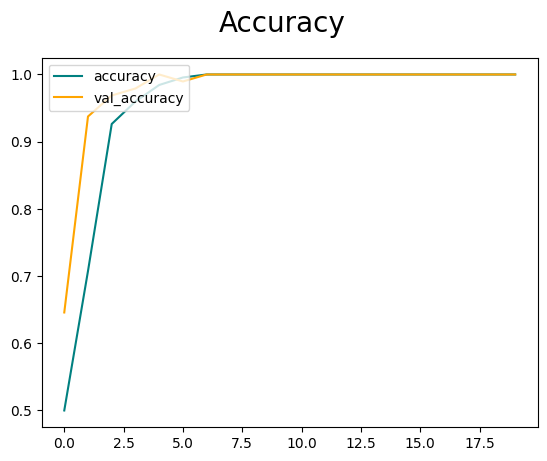

In [ ]:
# Plotting the Accuracy Value
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Calculating Accuracy, Precision, Recall and Confusion Matrix
# batch[0] -> test data
# batch[1] -> labels

X, y = batch
# Making predictions
predictions = model.predict(X)
predicted_labels = np.argmax(predictions, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y, predicted_labels)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y, predicted_labels, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

1/1 [==============================] - 0s 448ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[13  0  0]
 [ 0  7  0]
 [ 0  0 12]]


In [ ]:
# Saving the model
model.save(os.path.join('models', 'chart_classification.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


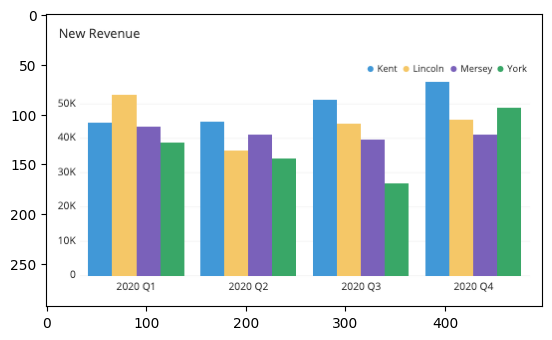

In [ ]:
# Testing the model
img = cv2.imread('bar1.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

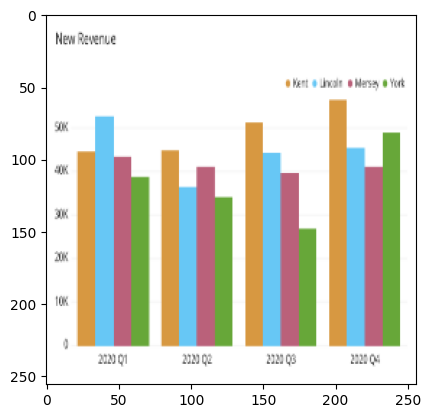

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# Converting the predicted output to one-hot encoded format
predicted_labels_one_hot = to_categorical(np.argmax(yhat, axis=1), num_classes=3)
predicted_class_index = np.argmax(predicted_labels_one_hot)

print(f'Index: {predicted_class_index}')
if predicted_class_index == 0:
  print('Predicted: Bar Chart')
elif predicted_class_index == 1:
  print('Predicted: Line Chart')
elif predicted_class_index == 2:
  print('Predicted: Scatter Chart')
else:
  print(f'Not categorized')


1/1 [==============================] - 0s 26ms/step
Index: 0
Predicted: Bar Chart


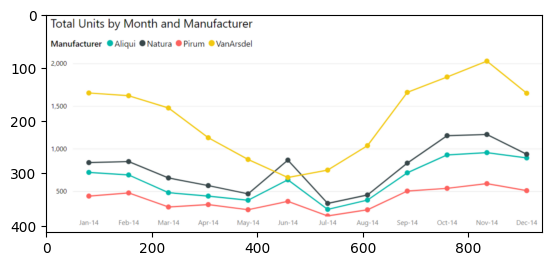

In [82]:
img = cv2.imread('line.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

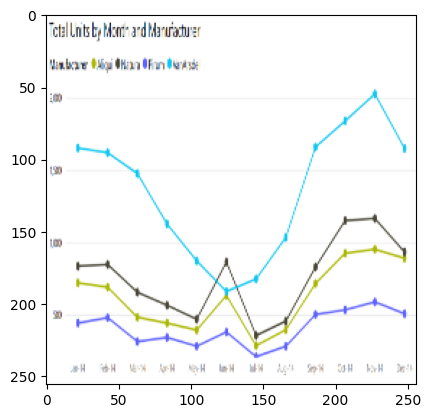

In [83]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [84]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# Converting the predicted output to one-hot encoded format
predicted_labels_one_hot = to_categorical(np.argmax(yhat, axis=1), num_classes=3)
predicted_class_index = np.argmax(predicted_labels_one_hot)

print(f'Index: {predicted_class_index}')
if predicted_class_index == 0:
  print('Predicted: Bar Chart')
elif predicted_class_index == 1:
  print('Predicted: Line Chart')
elif predicted_class_index == 2:
  print('Predicted: Scatter Chart')
else:
  print(f'Not categorized')

1/1 [==============================] - 0s 26ms/step
Index: 1
Predicted: Line Chart


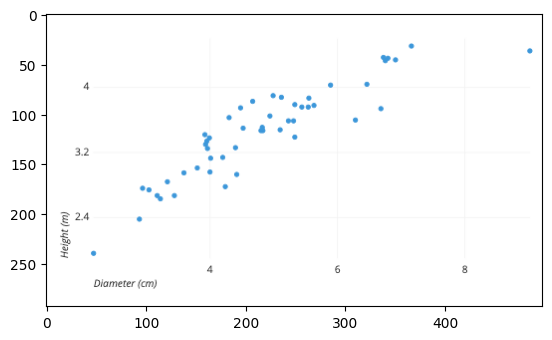

In [86]:
img = cv2.imread('sc.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

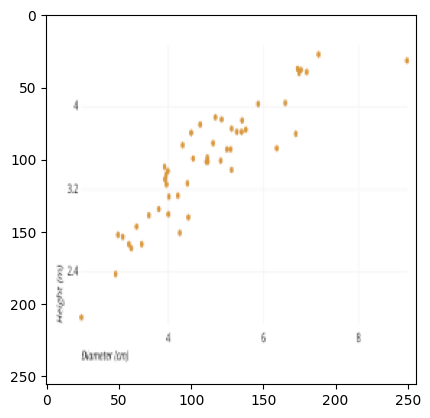

In [87]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# Converting the predicted output to one-hot encoded format
predicted_labels_one_hot = to_categorical(np.argmax(yhat, axis=1), num_classes=3)
predicted_class_index = np.argmax(predicted_labels_one_hot)

print(f'Index: {predicted_class_index}')
if predicted_class_index == 0:
  print('Predicted: Bar Chart')
elif predicted_class_index == 1:
  print('Predicted: Line Chart')
elif predicted_class_index == 2:
  print('Predicted: Scatter Chart')
else:
  print(f'Not categorized')

1/1 [==============================] - 0s 25ms/step
Index: 2
Predicted: Scatter Chart


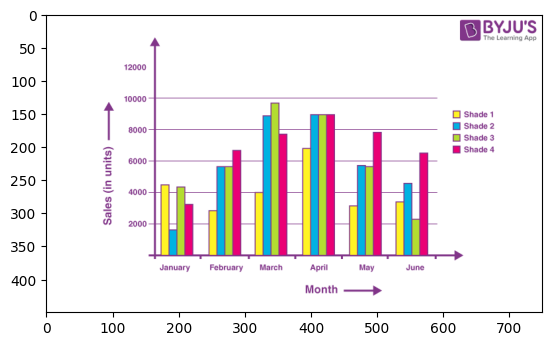

In [100]:
img = cv2.imread('bar3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

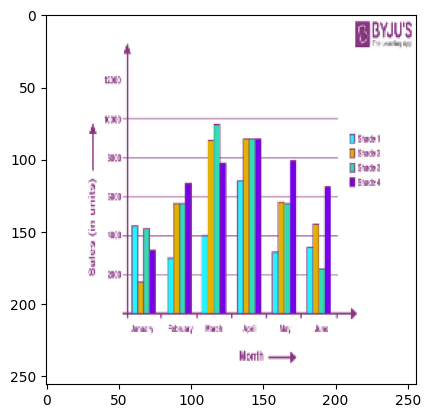

In [101]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# Converting the predicted output to one-hot encoded format
predicted_labels_one_hot = to_categorical(np.argmax(yhat, axis=1), num_classes=3)
predicted_class_index = np.argmax(predicted_labels_one_hot)

print(f'Index: {predicted_class_index}')
if predicted_class_index == 0:
  print('Predicted: Bar Chart')
elif predicted_class_index == 1:
  print('Predicted: Line Chart')
elif predicted_class_index == 2:
  print('Predicted: Scatter Chart')
else:
  print(f'Not categorized')

1/1 [==============================] - 0s 30ms/step
Index: 0
Predicted: Bar Chart
